<a href="https://colab.research.google.com/github/4m-world/p/blob/main/PythonIT_HRExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone the Source GitHub Reporsitory 
We need to clone some source files to be used throughtout this tutorial from the GitHub reprository

In [1]:
!rm -rf ./MachineLearning
!git clone https://github.com/mkjubran/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 273 (delta 11), reused 17 (delta 5), pack-reused 250
Receiving objects: 100% (273/273), 72.83 MiB | 27.81 MiB/s, done.
Resolving deltas: 100% (126/126), done.


# HR Analysis Exercise

In this section, we will analyze the data of employees of a company. This data includes some information about the employees who are working at the company and those who left the company. Our objective is to apply exploratory Data Analysis to determine which information is more relevant to the decision of employees to stay or leave the company. The features will be used later in the machine learning tutorial to predict whether an existing employee would leave the company based on his/her current status.$^{[1]}$

[1] https://codebasicshub.com/tutorial/machine-learning/logistic-regression-binary-classification

**Implementation**

Read the input data from the csv file (HR_comma_sep.csv) file. Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics. Use the pandas library (https://pandas.pydata.org/) to read the data from the file.

In [2]:
import pandas as pd
HR = pd.read_csv('./MachineLearning/2_logistic/HR_comma_sep.csv')
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


To use numpy for EDA, the data should be converted to numpy array.

In [3]:
import numpy as np
HRnp = np.array(HR)

1- How many employees left the compnay in the dataset?  

In [4]:
# write your code here
filterLeft = HR['left'] == 1
left = HR.loc[filterLeft]['left'].count()
left

3571

2- What is the percentage of employees who left the company?

In [5]:
# write your code here
total = HR['left'].count()
perLeft = left / total * 100.0
perLeft

23.80825388359224

3- The administration says that employees who remain in the company has higher satisfaction_level and thus it is a good indicator for our regression/classifier (good feature). Is this true?

In [6]:
# write your code here
filterStaff = HR['left'] != 1
leftSat = HR[filterLeft]['satisfaction_level'].mean()
staffSat = HR[filterStaff]['satisfaction_level'].mean()
staffSat > leftSat

True

4- The administration says that the last_evaluation, number of projects, and time_spend_company scores are almost independent of the employees remain or leave the company. Is this true?

In [7]:
# write your code here
staffLastEval = HR[filterStaff]['last_evaluation'].mean()
staffNumProj = HR[filterStaff]['number_project'].mean()
staffTimeSpn = HR[filterStaff]['time_spend_company'].mean()
print(staffLastEval, staffNumProj, staffTimeSpn)
nonStaffLastEval = HR[filterLeft]['last_evaluation'].mean()
nonStaffNumProj = HR[filterLeft]['number_project'].mean()
nonStaffTimeSpn = HR[filterLeft]['time_spend_company'].mean()
print(nonStaffLastEval, nonStaffNumProj, nonStaffTimeSpn)
print(True)

0.7154733986699274 3.786664333216661 3.3800315015750786
0.7181125735088183 3.8555026603192384 3.876505180621675
True


5- The administration claims that the promotion_last_5years feature of employees remaining in the company is much higher than those left the company (good feature). Is this true?

In [8]:
# write your code here
staffPromPast5y = HR[filterStaff]['promotion_last_5years'].mean()
nonStaffPromPast5y = HR[filterLeft]['promotion_last_5years'].mean()
print(staffPromPast5y, nonStaffPromPast5y)
# This assumption is invalid since we do not know when the employee left the 
# company exactly unless all data refer to the past five years.
staffPromPast5y > nonStaffPromPast5y

0.026251312565628283 0.005320638476617194


True

6- The Work_accident is an indicator for the decision of employees to leave/stay in the company and this is a good feature. Is this true?

In [9]:
# write your code here
staffWorkAccidents = HR[filterStaff]['Work_accident'].sum()
nonStaffWorkAccidents = HR[filterLeft]['Work_accident'].sum();
print(staffWorkAccidents, nonStaffWorkAccidents)
staffWorkAccidents > nonStaffWorkAccidents

2000 169


True

7- The data shows that emloyees with high salaries are more likely to stay in the company. So it is a good feature. What do you think?

In [10]:
# write your code here
filterHighSalary = HR['salary'] == 'high'
numNonStaffWithHighSalary = HR[filterLeft & filterHighSalary]['left'].count() / HR[filterLeft]['left'].count() * 100.0
numStaffWithHighSalary = HR[filterStaff & filterHighSalary]['left'].count() / HR[filterStaff]['left'].count() * 100.0
print(numNonStaffWithHighSalary, numStaffWithHighSalary)
numNonStaffWithHighSalary < numStaffWithHighSalary

2.2962755530663683 10.106755337766888


True

8- In the previous point you showed that emloyees with high salaries are more likely to stay in the company. Create a bar plot to visualize this.

[2.2962755530663683, 10.106755337766888]


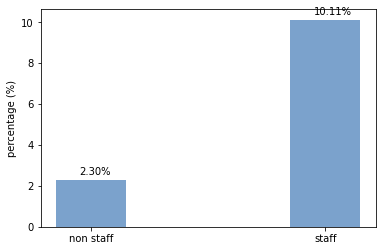

In [11]:
# write your code here
import matplotlib.pyplot as plt
# plt.bar(['Left Staff', 'Staff'],[HR[filterLeft & filterHighSalary]['left'].count(), HR[filterStaff & filterHighSalary]['left'].count()])
data = [numNonStaffWithHighSalary, numStaffWithHighSalary]
labels = ['non staff', 'staff']
width = 0.3
indx = range(len(data))
print(data)
fig, ax = plt.subplots()
ax.set_ylabel('percentage (%)')
b1 =ax.bar(indx, data, color ='#437bb7', width= width, alpha=0.7, align='center', linewidth = 0)
ax.set_xticks(indx)
ax.set_xticklabels(labels)
# (b1, labels=[f'{x:.3}' for x in data])
for i, v in enumerate(data):
  label = f'{v/100:.2%}'
  ax.text(i -.05, v + .25, label)
plt.show()
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)


9- The department type has a minor effect on the decision of employees to stay or leave the company. Create a bar plot to visualize this.

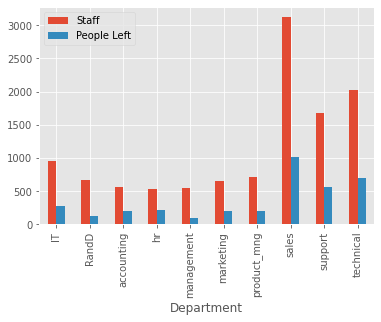

In [12]:
# write your code here
plt.style.use('ggplot')

leftByDepSeries = HR.where(filterLeft).groupby('Department')['left'].count().items()
leftByDepDf = pd.DataFrame(leftByDepSeries, columns = ['Department', 'People Left'])
leftByDepDf.set_index('Department')
#leftByDepDf.index.name = 'index'

staffByDepSeries = HR.where(filterStaff).groupby('Department')['left'].count().items()
staffByDepDf = pd.DataFrame(staffByDepSeries, columns = ['Department', 'Staff'])
staffByDepDf.set_index('Department')
#staffByDepDf.index.name = 'index'

chartData = pd.merge(staffByDepDf, leftByDepDf, on="Department", how="left")
chartData.head()

chartData.plot.bar(title="",x='Department')
print()
# staffByDepartment.plot(kind='bar', color="#2e98c9" )
# leftByDepartment.plot(kind='bar')